<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/Titanic_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle


In [9]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [10]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 25.0MB/s]


In [11]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction 

In [93]:
dataset = pd.read_csv("./train.csv")

In [74]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [94]:
dataset.drop(['Cabin'],inplace = True,axis = 1)

In [95]:
dataset = dataset.dropna()

In [96]:
dataset = dataset.sample(frac = 1)

In [97]:
median = dataset['Age'].median()
dataset['Age'] = dataset['Age'].fillna(median)

In [98]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,C
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S
...,...,...,...,...,...,...,...,...,...,...,...
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S


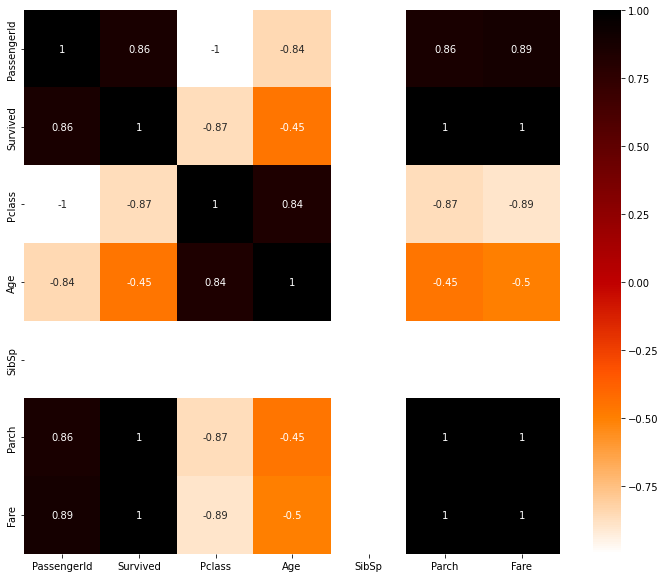

In [55]:
plt.figure(figsize = (12,10))
sns.heatmap(dataset.corr(),cmap = "gist_heat_r",annot = True)

In [29]:
corr_matrix = dataset.corr().abs()
corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dataset.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.999682,0.521694,0.977886,0.477988,0.025234,0.662499
Survived,0.999682,1.000000,0.500000,0.982852,0.500000,0.000000,0.643387
Pclass,0.521694,0.500000,1.000000,0.331734,0.500000,0.866025,0.984672
Age,0.977886,0.982852,0.331734,1.000000,0.651118,0.184397,0.491191
SibSp,0.477988,0.500000,0.500000,0.651118,1.000000,0.866025,0.341285
Parch,0.025234,0.000000,0.866025,0.184397,0.866025,1.000000,0.765541
Fare,0.662499,0.643387,0.984672,0.491191,0.341285,0.765541,1.000000


## Model Training

In [80]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,S
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [82]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
279,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,S
845,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,S
75,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
688,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,S
426,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,S
...,...,...,...,...,...,...,...,...,...
162,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,S
30,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
53,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,S
554,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S


In [100]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Sex'] = encoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = encoder.fit_transform(dataset['Embarked'])

In [101]:
dataset.drop(['Ticket'],inplace = True,axis = 1)

In [102]:
dataset.drop(['Name'],axis = 1,inplace= True)

In [86]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
279,280,1,3,0,35.0,1,1,20.2500,2
845,846,0,3,1,42.0,0,0,7.5500,2
75,76,0,3,1,25.0,0,0,7.6500,2
688,689,0,3,1,18.0,0,0,7.7958,2
426,427,1,2,0,28.0,1,0,26.0000,2
...,...,...,...,...,...,...,...,...,...
162,163,0,3,1,26.0,0,0,7.7750,2
30,31,0,1,1,40.0,0,0,27.7208,0
53,54,1,2,0,29.0,1,0,26.0000,2
554,555,1,3,0,22.0,0,0,7.7750,2


In [ ]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
336,337,1,1,29.00,1,0,66.60,2
645,646,1,1,48.00,1,0,76.73,0
427,428,2,0,19.00,0,0,26.00,2
699,700,3,1,42.00,0,0,7.65,2
286,287,3,1,30.00,0,0,9.50,2
...,...,...,...,...,...,...,...,...
534,535,3,0,30.00,0,0,8.66,2
377,378,1,1,27.00,0,2,211.50,0
610,611,3,0,39.00,1,5,31.27,2
689,690,1,0,15.00,0,1,211.34,2


In [103]:
x = dataset.drop(['Survived','PassengerId'],axis = 1)
y = dataset['Survived']

In [104]:
x['Age'] = (x['Age'] - x['Age'].min()) / (x['Age'].max() - x['Age'].min())
x['Fare'] = (x['Fare'] - x['Fare'].min()) / (x['Fare'].max() - x['Fare'].min())


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_val, y_train, y_val)

100%|██████████| 29/29 [00:01<00:00, 26.21it/s]


In [89]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
279,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,0.434531,1,1,C.A. 2673,0.039525,S
845,3,"Abbing, Mr. Anthony",male,0.522493,0,0,C.A. 5547,0.014737,S
75,3,"Moen, Mr. Sigurd Hansen",male,0.308872,0,0,348123,0.014932,S
688,3,"Fischer, Mr. Eberhard Thelander",male,0.220910,0,0,350036,0.015216,S
426,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,0.346569,1,0,2003,0.050749,S
...,...,...,...,...,...,...,...,...,...
162,3,"Bengtsson, Mr. John Viktor",male,0.321438,0,0,347068,0.015176,S
30,1,"Uruchurtu, Don. Manuel E",male,0.497361,0,0,PC 17601,0.054107,C
53,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,0.359135,1,0,2926,0.050749,S
554,3,"Ohman, Miss. Velin",female,0.271174,0,0,347085,0.015176,S


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.80,0.79,0.79,0.80,0.04
QuadraticDiscriminantAnalysis,0.79,0.78,0.78,0.79,0.01
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.10
NuSVC,0.78,0.77,0.77,0.78,0.04
SVC,0.79,0.77,0.77,0.78,0.02
KNeighborsClassifier,0.78,0.76,0.76,0.78,0.02
DecisionTreeClassifier,0.78,0.76,0.76,0.78,0.01
LGBMClassifier,0.78,0.76,0.76,0.77,0.05
BaggingClassifier,0.78,0.76,0.76,0.77,0.04


In [ ]:
x.shape

(712, 8)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
116,3,"Connors, Mr. Patrick",male,1.000000,0,0,370369,0.000000,Q
238,2,"Pengelly, Mr. Frederick William",male,0.000000,0,0,28665,0.058201,S
356,1,"Bowerman, Miss. Elsie Edith",female,0.058252,0,1,113505,1.000000,S


## ANN

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3,mode = "max")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2000,input_shape = (7,),),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer = tf.optimizers.Adam(),metrics = ["accuracy"])

In [ ]:
model.fit(x,y,epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 5ms/step - loss: 0.6560 - accuracy: 0.6573
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5424 - accuracy: 0.7472
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.7865
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.7612
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7935
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4680 - accuracy: 0.7992
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4825 - accuracy: 0.7795
Epoch 8/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4891 - accuracy: 0.7907
Epoch 9/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5043 - accuracy: 0.7935
Epoch 10/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7570
Epoch 11/

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgsmodel = LogisticRegression()
lgsmodel.fit(x,y)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(lgsmodel.predict(x_val),y_val)

0.7832167832167832

## XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Hyper Paramteric Tuning

In [ ]:
params = {
        'min_child_weight': np.random.randint(1,20,size = 10),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,10]
        }

In [ ]:
from xgboost import XGBClassifier
xgbooster =  XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False,
                          learning_rate=0.02, 
                          n_estimators=600,
                          n_threads = 1,
                          silent=True
                           
                          )


### Random Search

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgbooster, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )

random_search.fit(x,y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe70804e4d0>,
                   estimator=XGBClassifier(eval_metric='auc',
                                           grow_policy='lossguide',
                                           learning_rate=0.02, n_estimators=600,
                                           n_threads=1, silent=True,
                                           tree_method='hist',
                                           use_label_encoder=False),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5, 10],
                                        'min_child_weight': array([13,  8, 14,  8,  7,  5, 18, 11, 14,  1]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

### GridSearch

In [ ]:
grid = GridSearchCV(estimator=xgbooster, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3 )
grid.fit(x,y)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fe710087ed0>,
             estimator=XGBClassifier(eval_metric='auc', grow_policy='lossguide',
                                     learning_rate=0.02, n_estimators=600,
                                     n_threads=1, silent=True,
                                     tree_method='hist',
                                     use_label_encoder=False),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'max_depth': [3, 4, 5, 10],
                         'min_child_weight': array([19,  8, 12, 14,  3, 19,  2,  2,  6,  8]),
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=3)

## RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier_random_forest = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(x, y)

## Predictions

In [106]:
test_dataset = pd.read_csv("./test.csv")

In [107]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
test_dataset.drop(['Cabin'],axis = 1,inplace = True)

In [109]:
mean = test_dataset['Age'].mean()
test_dataset['Age'] = test_dataset['Age'].fillna(mean)

In [110]:
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].mean())

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_dataset['Sex'] = encoder.fit_transform(test_dataset['Sex'])
test_dataset['Embarked'] = encoder.fit_transform(test_dataset['Embarked'])
test_dataset['Ticket'] = encoder.fit_transform(test_dataset['Ticket'])

In [112]:
x_test = test_dataset.drop(['PassengerId','Name','Ticket'],axis = 1)

In [ ]:
x_test.shape

(418, 7)

In [113]:
x_test['Age'] = (x_test['Age'] - x_test['Age'].min()) / (x_test['Age'].max() - x_test['Age'].min())
x_test['Fare'] = (x_test['Fare'] - x_test['Fare'].min()) / (x_test['Fare'].max() - x_test['Fare'].min())

In [ ]:
y_pred = model.predict(x_test) > 0.5

14/14 [==============================] - 0s 2ms/step


In [ ]:
y_pred_0 = []
for i in range(len(y_pred)):
  if y_pred[i]:
    y_pred_0.append(1)
  else:
    y_pred_0.append(0)


In [ ]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_0}

In [ ]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission.csv",index = False)

### XG Predictions

In [ ]:
y_pred_xg = xgbooster.predict(x_test)

XGBoostError: ignored

In [ ]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_xg}

In [ ]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_xg.csv",index = False)

### Random Search Prediction

In [ ]:
y_pred_random_xg = random_search.predict(x_test)

In [ ]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_random_xg}

In [ ]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_random_xg.csv",index = False)

### Grid Search Prediction

In [ ]:
y_pred_grid_xg = grid.predict(x_test)

In [ ]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_random_xg}

In [ ]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_random_xg.csv",index = False)

### Random Search Prediction

In [115]:
y_pred_random_forest = classifier_random_forest.predict(x_test)
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_random_forest}

In [116]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_random_forest.csv",index = False)